In [1]:
###Regresja wielomianowa

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import plotly.graph_object as go
import seaborn as sns

In [3]:
root_path = "https://raw.githubusercontent.com/matzim95/ML-datasets/master/"
dataset_name = "abalone.csv"
path_to_data = root_path + dataset_name
df_abalone = pd.read_csv(path_to_data)

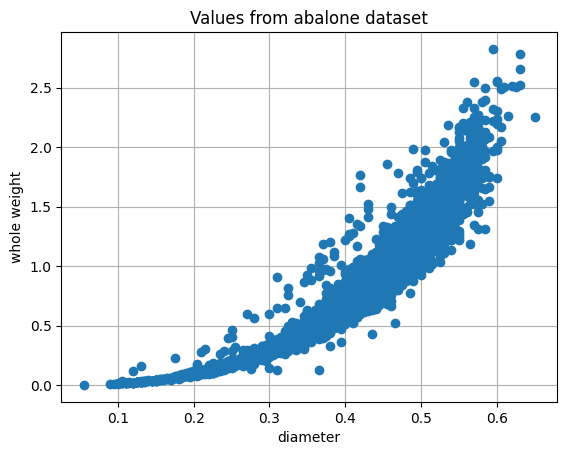

In [4]:
x_col = "diameter"
y_col = "whole weight"


x_values = df_abalone[x_col].values
y_values = df_abalone[y_col].values

x_values = x_values.reshape(-1,1)
y_values = y_values.reshape(-1,1)

fig,ax = plt.subplots()
ax.scatter(x_values, y_values, zorder=3)
ax.set_xlabel(x_col)
ax.set_ylabel(y_col)
ax.set_title("Values from abalone dataset")
ax.grid(zorder=0)

In [5]:
from sklearn.linear_model import LinearRegression

Text(0.1, 2.2, 'R^2=0.856')

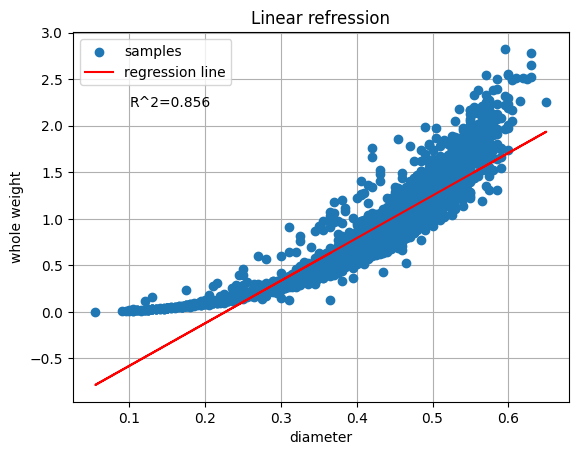

In [6]:
model = LinearRegression()
model.fit(x_values, y_values)

#wyznaczenie współczynnika determinacji
R2 = model.score(x_values, y_values)
R2 = np.round(R2,3)

fig,ax = plt.subplots()
ax.scatter(x_values, y_values, zorder=3, label='samples')
ax.plot(x_values, model.predict(x_values), zorder=3, color="red", label="regression line")
ax.set_xlabel(x_col)
ax.set_ylabel(y_col)
ax.set_title("Linear refression")
ax.legend()
ax.grid(zorder=0)
ax.text(x=0.1, y=2.2, s=f'R^2={R2}')

In [7]:
# Zastosowanie wielomianowej regresji liniowej

In [8]:
from sklearn.preprocessing import PolynomialFeatures

In [9]:
degree = 3
#Dodaje wielomain stopnia degree dla kazdej warotosci
poly = PolynomialFeatures(degree=degree)
x_poly_val = poly.fit_transform(x_values)

model_poly = LinearRegression()
model_poly.fit(x_poly_val, y_values)

R2 = model_poly.score(x_poly_val, y_values)
R2 = np.round(R2)

In [10]:
R2

1.0

Text(0.1, 2.2, 'R^2=1.0')

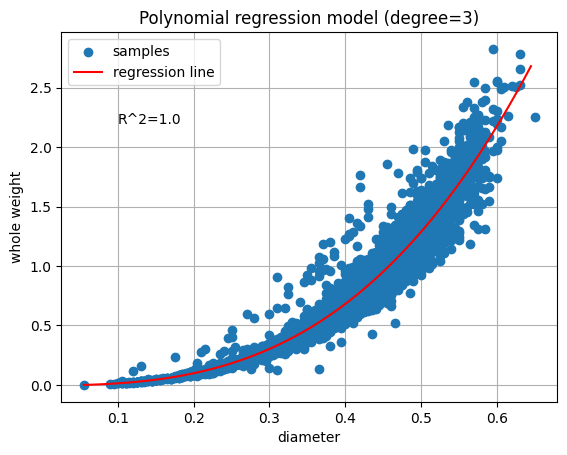

In [11]:
#wykres wielomianu
x_min = np.min(x_values)
x_max = np.max(x_values)

x_values_interval = np.arange(x_min, x_max, 0.01).reshape(-1,1)
y_pred_interval = model_poly.predict(poly.fit_transform(x_values_interval))



fig,ax = plt.subplots()
ax.scatter(x_values, y_values, zorder=3, label='samples')
ax.plot(x_values_interval, y_pred_interval, zorder=3, color="red", label="regression line")
ax.set_xlabel(x_col)
ax.set_ylabel(y_col)
ax.set_title("Polynomial regression model (degree=3)")
ax.legend()
ax.grid(zorder=0)
ax.text(x=0.1, y=2.2, s=f'R^2={R2}')

In [12]:
#Poszukiwanie optymalnego stopnia wielomianu

In [26]:
def found_polynomial_degree(x_val, y_val, degree):
    poly = PolynomialFeatures(degree=degree)
    x_poly_val = poly.fit_transform(x_val)
    
    x_interval_values = np.arange(x_min, x_max, 0.01).reshape(-1, 1)
    
    model_poly = LinearRegression()
    model_poly.fit(x_poly_val, y_val)
    
    y_pred_val = model_poly.predict(poly.fit_transform(x_interval_values))
    
    R2 = model_poly.score(x_poly_val, y_values)
    R2 = np.round(R2, 5)
    coef = model_poly.coef_
    
    return (y_pred_val, x_interval_values, R2, coef)
    

In [27]:
degrees = range(1,10)
R2_values_list = []
coefs = dict()

0.85646
0.92676
0.92774
0.92775
0.92775
0.9278
0.92787
0.92788
0.92788


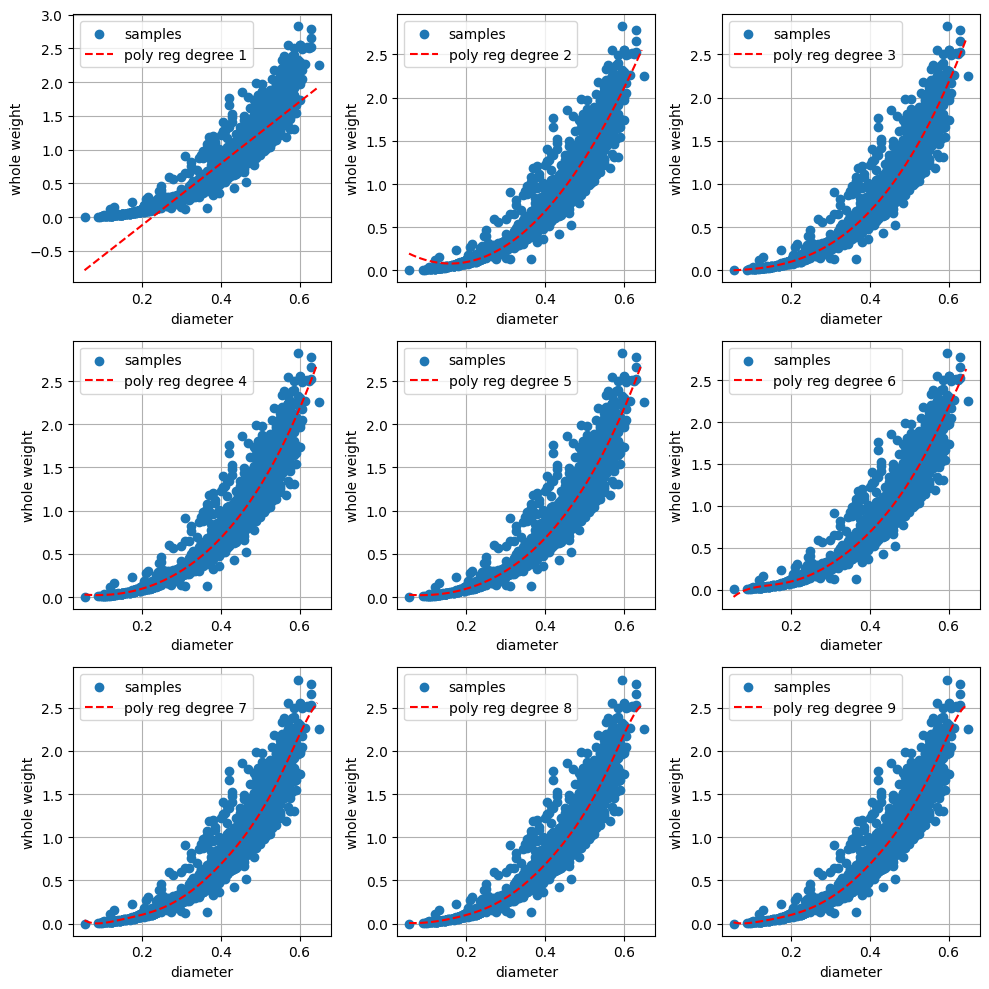

In [28]:
fig, ax = plt.subplots(3, 3)
for counter, it in enumerate(degrees):
    y, x, r, coef = found_polynomial_degree(x_values, y_values, it)
    print(r)
    R2_values_list.append(r)
    coefs[it] = coef
    
    i = counter // 3
    j = counter % 3
    
    ax[i, j].scatter(x_values, y_values, label='samples', zorder=3)
    ax[i, j].plot(x, y, color="red", linestyle="--", zorder=3, label=f"poly reg degree {it}")
    ax[i, j].set_xlabel(x_col)
    ax[i, j].set_ylabel(y_col)
    ax[i, j].legend()
    ax[i, j].grid(zorder=0)
    
    fig.set_size_inches(10, 10)
    plt.tight_layout()
    

In [20]:
# Optymalna wartość współczynników dla optymalnego stopnia wielomianu

In [23]:
degrees

range(1, 10)

In [29]:
R2_values_list

[0.85646,
 0.92676,
 0.92774,
 0.92775,
 0.92775,
 0.9278,
 0.92787,
 0.92788,
 0.92788]

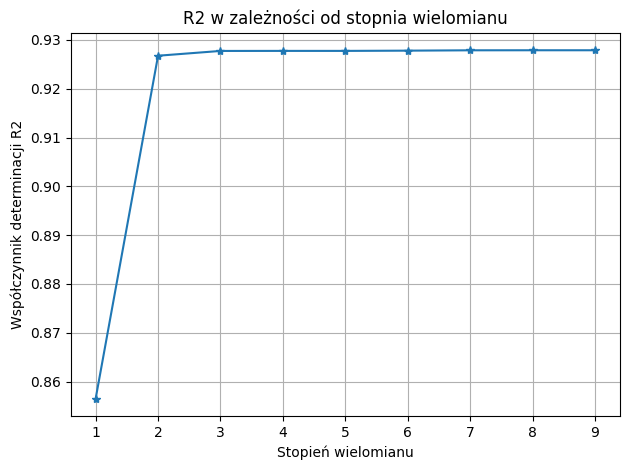

In [32]:
fig, ax = plt.subplots()
ax.plot(degrees, R2_values_list, "*-")
ax.set_title("R2 w zależności od stopnia wielomianu")
ax.set_ylabel("Współczynnik determinacji R2")
ax.set_xlabel("Stopień wielomianu")
ax.grid()
plt.tight_layout()